# Analysis and visual inspection of human mobility subflows

In [69]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

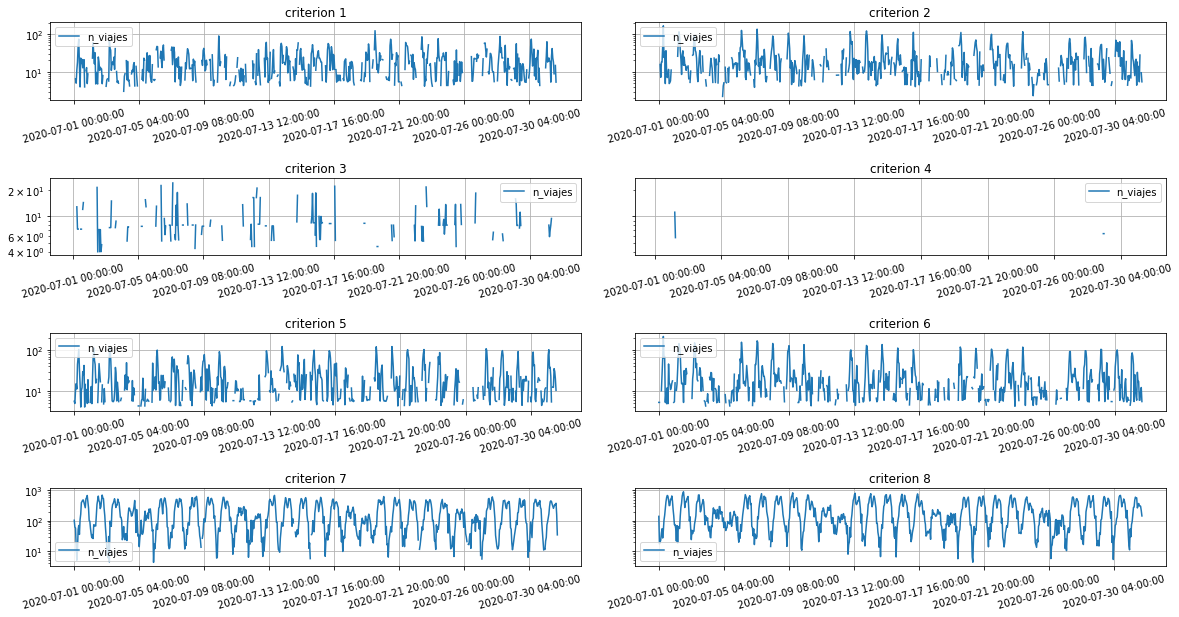

In [70]:
f, axes = plt.subplots(4, 2, figsize=(20,10), sharey='row')#, sharex='col')
f.subplots_adjust(hspace=1, wspace=0.1)
axe = axes.ravel()
for c in range(1,9):
    flow = pd.read_csv(os.path.join('data', 'INE_subflows','flow_criterion_{}.csv'.format(c)), index_col=0)
    subflows[c] = flow
    flow.plot(ax=axe[c-1], label=c, grid=True, logy=True, title='criterion {}'.format(c))
    axe[c-1].tick_params(axis='x', labelrotation=15)


Rate of null points in the target time series

In [80]:
for c in range(1,9):
    df = subflows[c]
    num_nan= df['n_viajes'].isna().sum()
    print('Criterion: {}: # non-null points: {}, # total points: {}, rate: {:.2f}'.format(c, num_nan, len(df), num_nan/len(df)))

Criterion: 1: # non-null points: 185, # total points: 744, rate: 0.25
Criterion: 2: # non-null points: 196, # total points: 744, rate: 0.26
Criterion: 3: # non-null points: 495, # total points: 744, rate: 0.67
Criterion: 4: # non-null points: 718, # total points: 744, rate: 0.97
Criterion: 5: # non-null points: 185, # total points: 744, rate: 0.25
Criterion: 6: # non-null points: 174, # total points: 744, rate: 0.23
Criterion: 7: # non-null points: 7, # total points: 744, rate: 0.01
Criterion: 8: # non-null points: 2, # total points: 744, rate: 0.00
